In [2]:
import runner
import utils
import dataset
import dataclasses
import matlab.engine
import lstm_model
import reference_impl

In [1]:
cfg = utils.Config(
    num_rx_antennas=1,
    num_tx_antennas=32,
    num_subcarriers=80,
    train_test_split=0.8,
    data_root="../data/dataset2",
    reduce_pca_overhead=False,
    epochs=10,
    compression_rate_dct=0.6,
    predictor_window_size = 5,
    total_bits=512,
    results_save_path="../results",
    compressor_type="kmeans",
    preprocessor_type="real_imag",
    trunc_lstm_pred=20,
    max_pca_coeffs=200
    # duplicate_data=1,
    # data_snr=-1
)

matlab = matlab.engine.start_matlab()

dataset.combine_time_series_paths(
    cfg.data_root,
    list(range(32)),
    2.5e9,
    "train_set.pickle"
)
dataset.combine_time_series_paths(
    cfg.data_root,
    list(range(33,40)),
    2.62e9,
    "test_set.pickle"
)

NameError: name 'utils' is not defined

Running Model lstm_pca200, btot 256, pred_size 5
This is the LSTM
Fitting the PCA
Fitting the LSTM
Training k-means clustering...
Considering bTot: 100
Considering bTot: 200


  0%|          | 0/10 [00:00<?, ?it/s]

Predicted zdl: (3076, 200)
Predicted zdl: (3076, 200)
ul_pred_error: (3076, 200)
Assessing performance...
Plotting results...


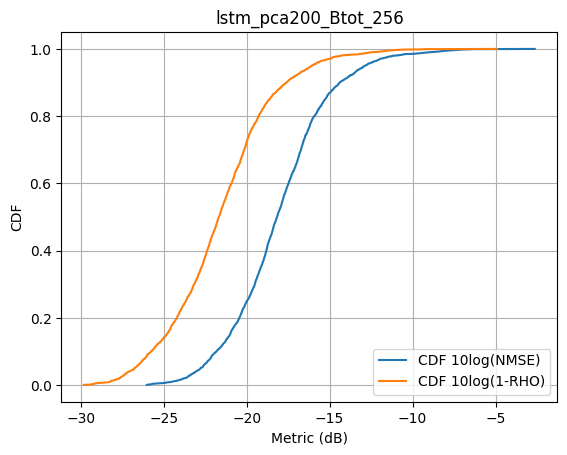

Test for lstm_pca200 256 complete!
Training k-means clustering...
Considering bTot: 100
Considering bTot: 200


  0%|          | 0/10 [00:00<?, ?it/s]

Assessing performance...
Plotting results...


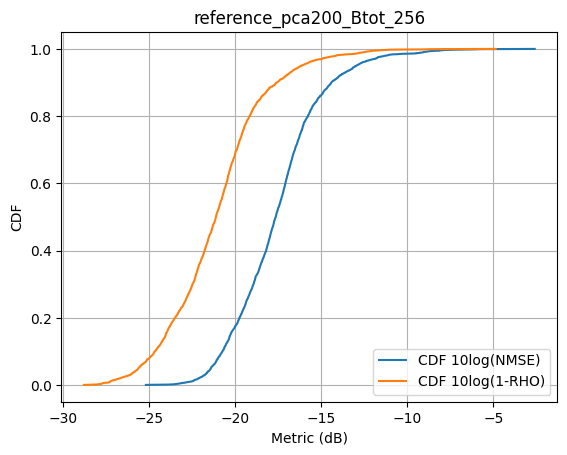

Running Model lstm_pca200, btot 512, pred_size 5
This is the LSTM
Fitting the PCA
Fitting the LSTM
Training k-means clustering...
Considering bTot: 100
Considering bTot: 200
Considering bTot: 300
Considering bTot: 400
Considering bTot: 500


  0%|          | 0/12 [00:00<?, ?it/s]

Predicted zdl: (3076, 200)
Predicted zdl: (3076, 200)
ul_pred_error: (3076, 200)
Assessing performance...
Plotting results...


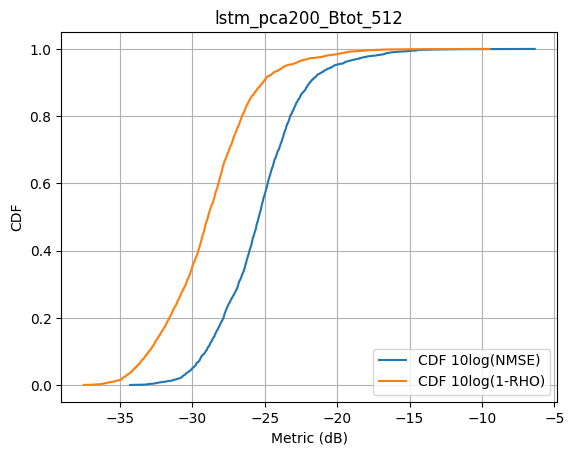

Test for lstm_pca200 512 complete!
Training k-means clustering...
Considering bTot: 100
Considering bTot: 200
Considering bTot: 300
Considering bTot: 400
Considering bTot: 500


  0%|          | 0/12 [00:00<?, ?it/s]

Assessing performance...
Plotting results...


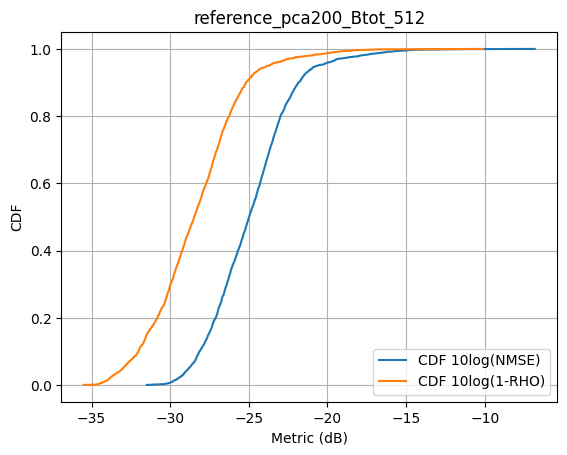

Running Model lstm_pca200, btot 1024, pred_size 5
This is the LSTM
Fitting the PCA
Fitting the LSTM
Training k-means clustering...
Considering bTot: 100
Considering bTot: 200
Considering bTot: 300
Considering bTot: 400
Considering bTot: 500
Considering bTot: 600
Considering bTot: 700
Considering bTot: 800
Considering bTot: 900
Considering bTot: 1000


  0%|          | 0/13 [00:00<?, ?it/s]

Predicted zdl: (3076, 200)
Predicted zdl: (3076, 200)
ul_pred_error: (3076, 200)
Assessing performance...
Plotting results...


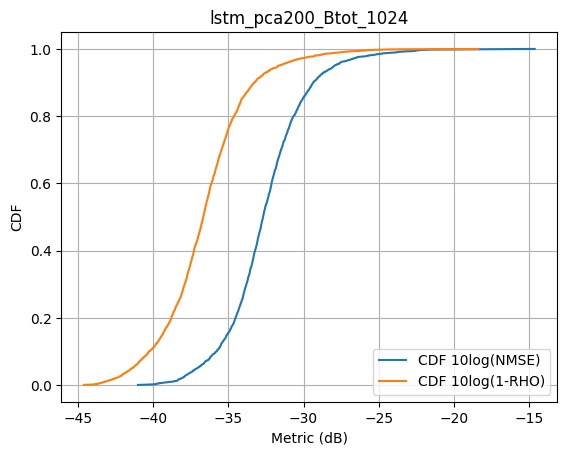

Test for lstm_pca200 1024 complete!
Training k-means clustering...
Considering bTot: 100
Considering bTot: 200
Considering bTot: 300
Considering bTot: 400
Considering bTot: 500
Considering bTot: 600
Considering bTot: 700
Considering bTot: 800
Considering bTot: 900
Considering bTot: 1000


  0%|          | 0/13 [00:00<?, ?it/s]

Assessing performance...
Plotting results...


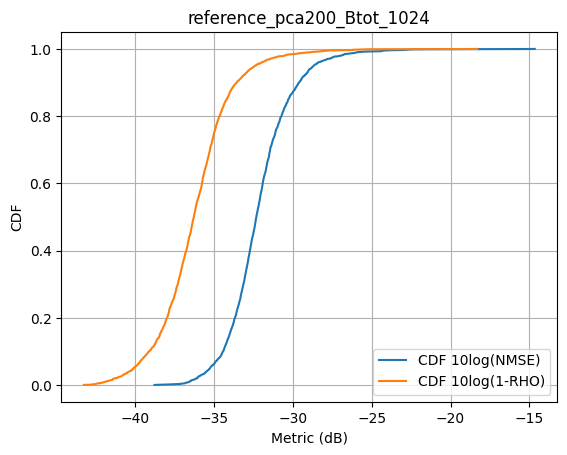

Running Model lstm_pca200, btot 1536, pred_size 5
This is the LSTM
Fitting the PCA
Fitting the LSTM
Training k-means clustering...
Considering bTot: 100
Considering bTot: 200
Considering bTot: 300
Considering bTot: 400
Considering bTot: 500
Considering bTot: 600
Considering bTot: 700
Considering bTot: 800
Considering bTot: 900
Considering bTot: 1000
Considering bTot: 1100
Considering bTot: 1200
Considering bTot: 1300
Considering bTot: 1400
Considering bTot: 1500


  0%|          | 0/13 [00:00<?, ?it/s]

Predicted zdl: (3076, 200)
Predicted zdl: (3076, 200)
ul_pred_error: (3076, 200)
Assessing performance...
Plotting results...


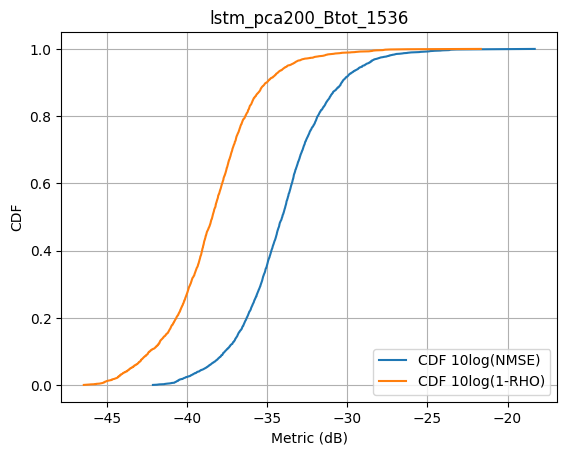

Test for lstm_pca200 1536 complete!
Training k-means clustering...
Considering bTot: 100
Considering bTot: 200
Considering bTot: 300
Considering bTot: 400
Considering bTot: 500
Considering bTot: 600
Considering bTot: 700
Considering bTot: 800
Considering bTot: 900
Considering bTot: 1000
Considering bTot: 1100
Considering bTot: 1200
Considering bTot: 1300
Considering bTot: 1400
Considering bTot: 1500


  0%|          | 0/13 [00:00<?, ?it/s]

Assessing performance...
Plotting results...


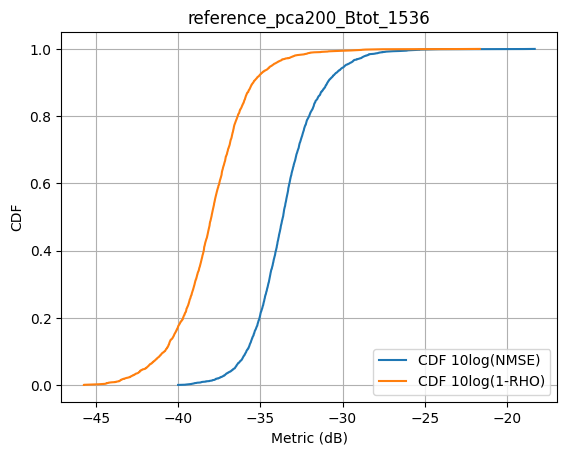

Running Model lstm_pca200, btot 2048, pred_size 5
This is the LSTM
Fitting the PCA
Fitting the LSTM
Training k-means clustering...
Considering bTot: 100
Considering bTot: 200
Considering bTot: 300
Considering bTot: 400
Considering bTot: 500
Considering bTot: 600
Considering bTot: 700
Considering bTot: 800
Considering bTot: 900
Considering bTot: 1000
Considering bTot: 1100
Considering bTot: 1200
Considering bTot: 1300
Considering bTot: 1400
Considering bTot: 1500
Considering bTot: 1600
Considering bTot: 1700
Considering bTot: 1800


Index exceeds the number of array elements. Index must not exceed 200.

Error in func_allocate_bits (line 33)
        elseif Bs(np) < Bs(np-1)
               ^^^^^^



MatlabExecutionError: 
  File /Users/dziper/UCSD/F24/ECE 257A/NonstaticCSI/project/func_allocate_bits.m, line 33, in func_allocate_bits
Index exceeds the number of array elements. Index must not exceed 200.


In [6]:
possible_bits =[256, 512, 1024, 1536, 2048]
for btot in possible_bits:
    this_cfg = dataclasses.replace(cfg, total_bits=btot)

    runner.run_model(
        this_cfg,
        matlab,
        lstm_model.FullLSTMModel,
        "lstm_pca200",
        # simulation=True
    )

    runner.run_reference_model(
        this_cfg,
        matlab,
        reference_impl.FullReferenceModel,
        "reference_pca200"
    )



Training k-means clustering...
Considering bTot: 100
Considering bTot: 200
Considering bTot: 300
Considering bTot: 400
Considering bTot: 500


  0%|          | 0/12 [00:00<?, ?it/s]

Assessing performance...
Plotting results...


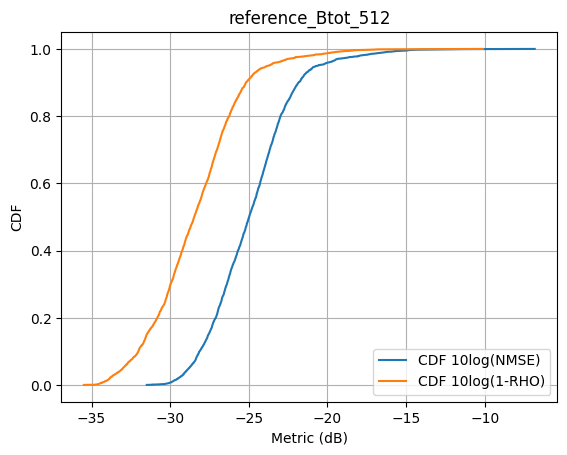

Training k-means clustering...
Considering bTot: 100


  0%|          | 0/7 [00:00<?, ?it/s]

Assessing performance...
Plotting results...


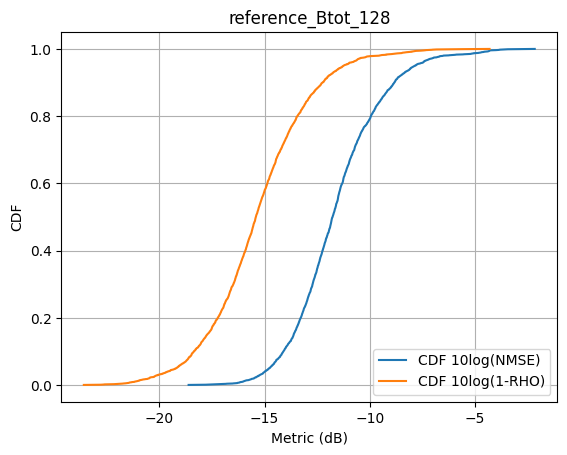

In [1]:
# import utils
# import matlab.engine
# import dataclasses
# import runner
# import reference_impl
# 
# cfg = utils.Config(
#     num_rx_antennas=1,
#     num_tx_antennas=32,
#     num_subcarriers=80,
#     train_test_split=0.8,
#     data_root="../data/dataset2",
#     reduce_pca_overhead=False,
#     epochs=10,
#     compression_rate_dct=0.6,
#     predictor_window_size = 5,
#     total_bits=512,
#     results_save_path="../results",
#     compressor_type="kmeans",
#     preprocessor_type="real_imag",
#     trunc_lstm_pred=20
#     # duplicate_data=1,
#     # data_snr=-1
# )
# 
# matlab = matlab.engine.start_matlab()
# possible_bits = [128]
# 
# for btot in possible_bits:
#     this_cfg = dataclasses.replace(cfg, total_bits=btot)
# 
#     # runner.run_model(
#     #     this_cfg,
#     #     matlab,
#     #     reference_impl.FullReferenceModel,
#     #     "reference"
#     # )
#     
#     runner.run_reference_model(
#         this_cfg,
#         matlab,
#         reference_impl.FullReferenceModel,
#         "reference"
#     )



Running Model lstm_pca40, btot 128, pred_size 5
This is the LSTM
Fitting the PCA
Fitting the LSTM
Training k-means clustering...
Considering bTot: 100


  0%|          | 0/7 [00:00<?, ?it/s]

Predicted zdl: (3076, 40)
Predicted zdl: (3076, 40)
ul_pred_error: (3076, 40)
Assessing performance...
Plotting results...


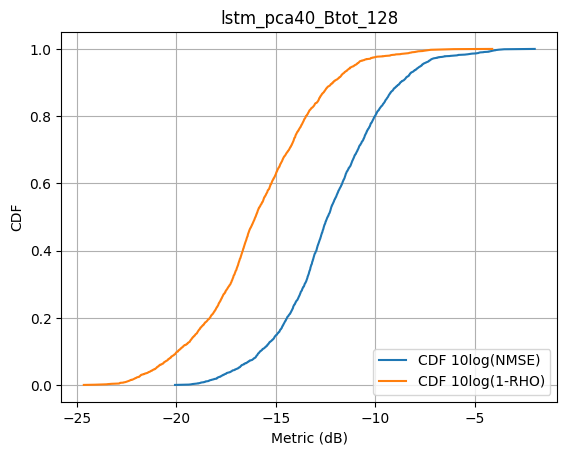

Test for lstm_pca40 128 complete!
Running Model lstm_pca80, btot 128, pred_size 5
This is the LSTM
Fitting the PCA
Fitting the LSTM
Training k-means clustering...
Considering bTot: 100


  0%|          | 0/7 [00:00<?, ?it/s]

Predicted zdl: (3076, 80)
Predicted zdl: (3076, 80)
ul_pred_error: (3076, 80)
Assessing performance...
Plotting results...


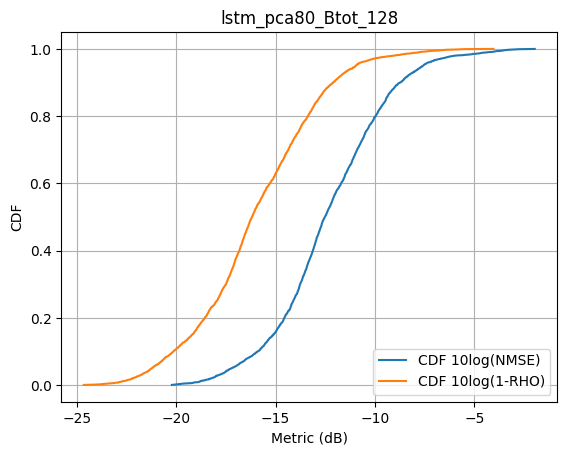

Test for lstm_pca80 128 complete!
Running Model lstm_pca160, btot 128, pred_size 5
This is the LSTM
Fitting the PCA
Fitting the LSTM
Training k-means clustering...
Considering bTot: 100


  0%|          | 0/7 [00:00<?, ?it/s]

Predicted zdl: (3076, 160)
Predicted zdl: (3076, 160)
ul_pred_error: (3076, 160)
Assessing performance...
Plotting results...


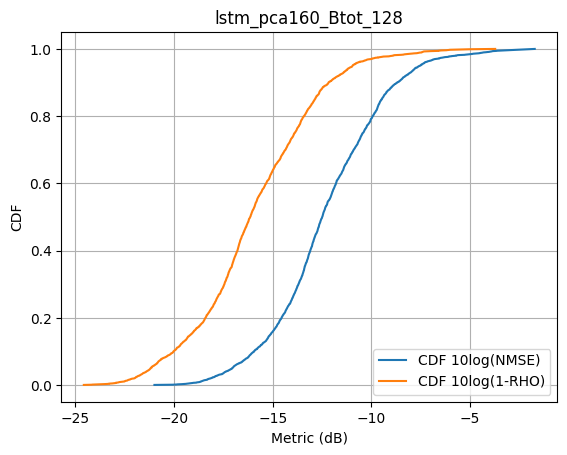

Test for lstm_pca160 128 complete!
Running Model lstm_pca320, btot 128, pred_size 5
This is the LSTM
Fitting the PCA
Fitting the LSTM
Training k-means clustering...
Considering bTot: 100


  0%|          | 0/7 [00:00<?, ?it/s]

Predicted zdl: (3076, 320)
Predicted zdl: (3076, 320)
ul_pred_error: (3076, 320)
Assessing performance...
Plotting results...


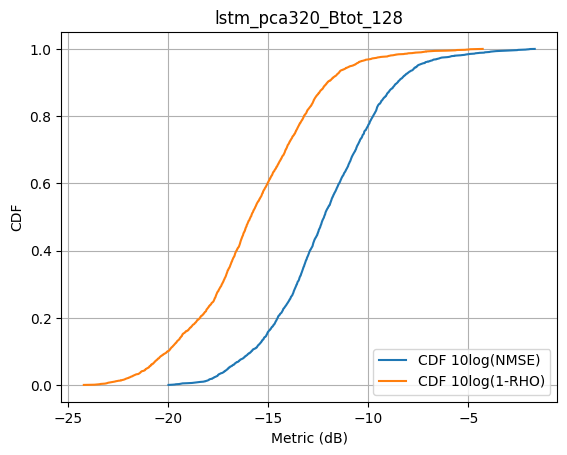

Test for lstm_pca320 128 complete!


In [8]:

cfg = utils.Config(
    num_rx_antennas=1,
    num_tx_antennas=32,
    num_subcarriers=80,
    train_test_split=0.8,
    data_root="../data/dataset2",
    reduce_pca_overhead=False,
    epochs=10,
    compression_rate_dct=0.6,
    predictor_window_size = 5,
    total_bits=128,
    results_save_path="../results",
    compressor_type="kmeans",
    preprocessor_type="real_imag",
    trunc_lstm_pred=20,
    max_pca_coeffs=200
    # duplicate_data=1,
    # data_snr=-1
)

for pcas in [40, 80, 160, 320]:
    this_cfg = dataclasses.replace(cfg, max_pca_coeffs=pcas)

    runner.run_model(
        this_cfg,
        matlab,
        lstm_model.FullLSTMModel,
        f"lstm_pca{pcas}",
        # simulation=True
    )


Running Model onehist, btot 128, pred_size 1
This is the History Model
Fitting the PCA
Fitting the LSTM
Training k-means clustering...
Considering bTot: 100


  0%|          | 0/7 [00:00<?, ?it/s]

Predicted zdl: (3084, 200)
Predicted zdl: (3084, 200)
ul_pred_error: (3084, 200)
Assessing performance...
Plotting results...


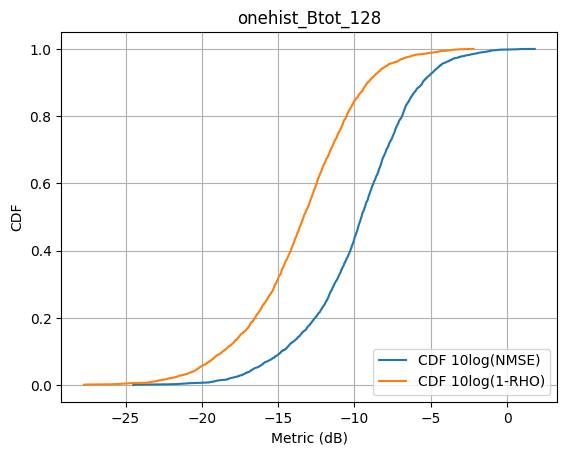

Test for onehist 128 complete!
Running Model fiveavghist, btot 128, pred_size 5
This is the History Model
Fitting the PCA
Fitting the LSTM
Training k-means clustering...
Considering bTot: 100


  0%|          | 0/7 [00:00<?, ?it/s]

Predicted zdl: (3076, 200)
Predicted zdl: (3076, 200)
ul_pred_error: (3076, 200)
Assessing performance...
Plotting results...


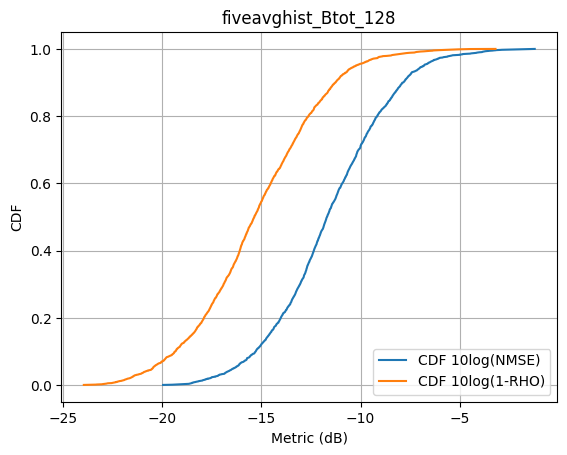

Test for fiveavghist 128 complete!
Running Model lstm_pca200, btot 128, pred_size 5
This is the LSTM
Fitting the PCA
Fitting the LSTM


/Users/dziper/opt/anaconda3/envs/csi/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Training k-means clustering...
Considering bTot: 100


  0%|          | 0/7 [00:00<?, ?it/s]

Predicted zdl: (3076, 200)
Predicted zdl: (3076, 200)
ul_pred_error: (3076, 200)
Assessing performance...
Plotting results...


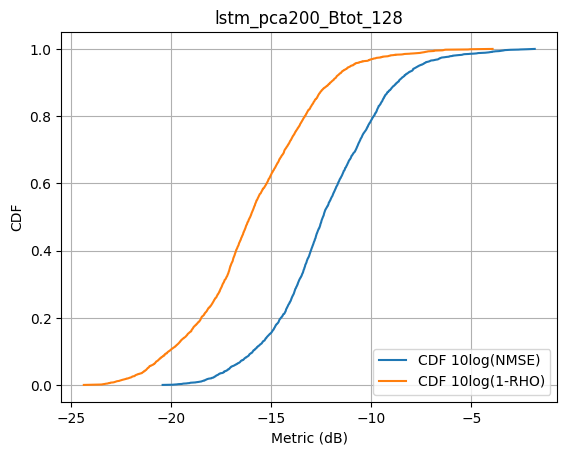

Test for lstm_pca200 128 complete!
Training k-means clustering...
Considering bTot: 100


  0%|          | 0/7 [00:00<?, ?it/s]

Assessing performance...
Plotting results...


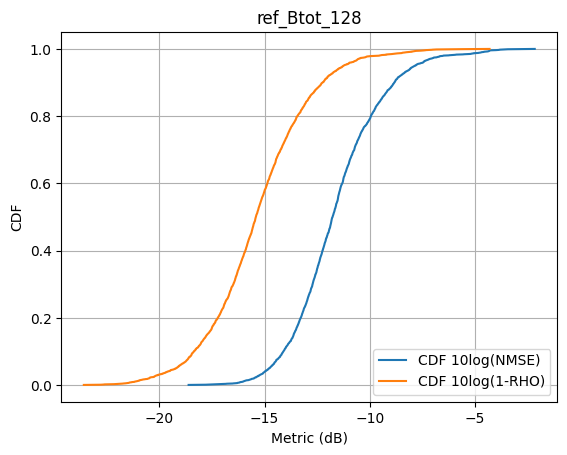

In [3]:

this_cfg = utils.Config(
    num_rx_antennas=1,
    num_tx_antennas=32,
    num_subcarriers=80,
    train_test_split=0.8,
    data_root="../data/dataset2",
    reduce_pca_overhead=False,
    epochs=10,
    compression_rate_dct=0.6,
    predictor_window_size = 5,
    total_bits=128,
    results_save_path="../results",
    compressor_type="kmeans",
    preprocessor_type="real_imag",
    trunc_lstm_pred=20,
    max_pca_coeffs=200
    # duplicate_data=1,
    # data_snr=-1
)

matlab = matlab.engine.start_matlab()
this_cfg = dataclasses.replace(this_cfg, predictor_window_size=1)
runner.run_model(
    this_cfg,
    matlab,
    lstm_model.SimpleHistoryModel,
    f"onehist",
    # simulation=True
)

this_cfg = dataclasses.replace(this_cfg, predictor_window_size=5)
runner.run_model(
    this_cfg,
    matlab,
    lstm_model.SimpleHistoryModel,
    f"fiveavghist",
    # simulation=True
)

runner.run_model(
    this_cfg,
    matlab,
    lstm_model.FullLSTMModel,
    f"lstm_pca{this_cfg.max_pca_coeffs}",
    # simulation=True
)

this_cfg = dataclasses.replace(this_cfg, max_pca_coeffs=500, predictor_window_size=5)
runner.run_reference_model(
    this_cfg,
    matlab,
    reference_impl.FullReferenceModel,
    f"ref",
    # simulation=True
)
